In [37]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.svm import SVC

from sklearn.neural_network import MLPClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score,roc_curve,auc

In [38]:
df = pd.read_csv(os.getcwd()+"/HMEQ.csv",engine='python',encoding='euc-kr')
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [39]:

df['JOB'].fillna('Other',inplace=True)
df.fillna(df.mean(),inplace=True)

In [40]:

df_dummy=pd.get_dummies(df)
df_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [41]:
df_train, df_test = train_test_split(df_dummy,test_size=0.3 , random_state=1234)
print(df_train.shape)
print(df_test.shape)

(2623, 19)
(1125, 19)


In [42]:
df_train_x = df_train.drop('BAD',axis=1)
df_train_y = df_train['BAD']

df_test_x = df_test.drop('BAD',axis=1)
df_test_y = df_test['BAD']

print(df_train_x.shape)
print(df_train_y.shape)
print(df_test_x.shape)
print(df_test_y.shape)

(2623, 18)
(2623,)
(1125, 18)
(1125,)


In [43]:
model = ['Decision_Tree','RandomForest','GradientBoosting','NeuralNet']
train_accuracy = []; test_accuracy=[]
model_f1_score=[]
model_auc=[]

In [44]:
df_model =DecisionTreeClassifier(max_depth=4,min_samples_leaf=30)
df_model.fit(df_train_x, df_train_y)

train_accuracy.append(df_model.score(df_train_x,df_train_y))
test_accuracy.append(df_model.score(df_test_x,df_test_y))

y_pred = df_model.predict(df_test_x)
fpr,tpr,thresholds = roc_curve(df_test_y,y_pred)
roc_auc = auc(fpr,tpr)

model_auc.append(roc_auc)

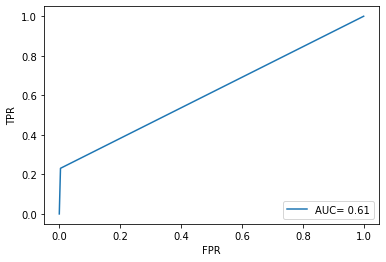

In [45]:
plt.plot(fpr,tpr,label='AUC= %0.2f'%roc_auc)
plt.legend(loc="lower right")
plt.ylabel('TPR'); plt.xlabel('FPR')
plt.show()

In [46]:
model_f1_score.append(f1_score(df_test_y,y_pred))

In [47]:
rf_model = RandomForestClassifier(min_samples_leaf=20,max_depth=4, n_estimators=100,random_state=1234)
rf_model.fit(df_train_x,df_train_y)

train_accuracy.append(df_model.score(df_train_x,df_train_y))
test_accuracy.append(df_model.score(df_test_x,df_test_y))

y_pred = rf_model.predict(df_test_x)

fpr,tpr,thresholds = roc_curve(df_test_y,y_pred)
roc_auc = auc(fpr,tpr)

model_auc.append(roc_auc)

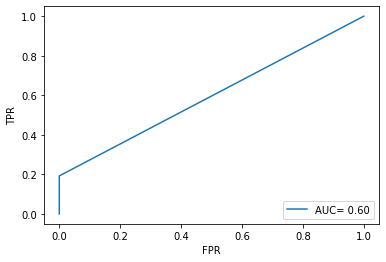

In [48]:
plt.plot(fpr,tpr,label='AUC= %0.2f'%roc_auc)
plt.legend(loc="lower right")
plt.ylabel('TPR'); plt.xlabel('FPR')
plt.show()

In [49]:
model_f1_score.append(f1_score(df_test_y,y_pred))

In [50]:
gb_final = GradientBoostingClassifier(min_samples_leaf=10, max_depth=4, n_estimators=100,learning_rate=0.1,random_state=1234)

gb_final.fit(df_train_x, df_train_y)

train_accuracy.append(gb_final.score(df_train_x,df_train_y))
test_accuracy.append(gb_final.score(df_test_x,df_test_y))

y_pred = gb_final.predict(df_test_x)
fpr,tpr,thresholds = roc_curve(df_test_y,y_pred)
roc_auc = auc(fpr,tpr)
model_auc.append(roc_auc)

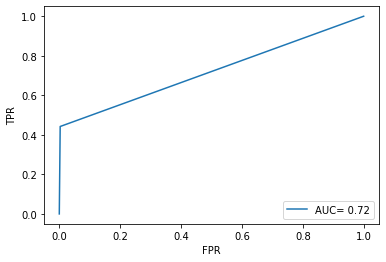

In [51]:
plt.plot(fpr,tpr,label='AUC= %0.2f'%roc_auc)
plt.legend(loc="lower right")
plt.ylabel('TPR'); plt.xlabel('FPR')
plt.show()

In [52]:
model_f1_score.append(f1_score(df_test_y,y_pred))

In [53]:
v_feature_names = df_train_x.columns
df_raw_x = df_dummy.drop('BAD', axis=1)

# df_raw_x.head()
scaler=StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled,columns= v_feature_names)

df_scaled_train_x , df_scaled_test_x = train_test_split(df_scaled , test_size=0.3,random_state=1234)
print(df_scaled_train_x.shape)
print(df_scaled_test_x.shape)

(2623, 18)
(1125, 18)


In [54]:
nn_model = MLPClassifier(hidden_layer_sizes=(80,80), activation='relu', solver='adam', random_state=1234)
nn_model.fit(df_scaled_train_x,df_train_y)

train_accuracy.append(nn_model.score(df_scaled_train_x,df_train_y))
test_accuracy.append(nn_model.score(df_scaled_test_x,df_test_y))

y_pred = nn_model.predict(df_scaled_test_x)
fpr,tpr,thresholds = roc_curve(df_test_y,y_pred)
roc_auc = auc(fpr,tpr)
model_auc.append(roc_auc)


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


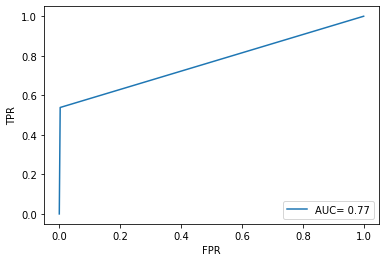

In [55]:
plt.plot(fpr,tpr,label='AUC= %0.2f'%roc_auc)
plt.legend(loc="lower right")
plt.ylabel('TPR'); plt.xlabel('FPR')
plt.show()

In [56]:
model_f1_score.append(f1_score(df_test_y,y_pred))

In [57]:
df_eval = pd.DataFrame(index = model)
df_eval['TrainAccuracy']= train_accuracy
df_eval['TestAccuracy'] = test_accuracy
df_eval['F1Score'] = model_f1_score
df_eval['AUC'] = model_auc
df_eval.round(3)

,TrainAccuracy,TestAccuracy,F1Score,AUC
Decision_Tree,0.930,0.925,0.364,0.613
RandomForest,0.930,0.925,0.323,0.596
GradientBoosting,0.977,0.946,0.601,0.720
NeuralNet,1.000,0.955,0.687,0.768


### 인공신경망에서 가장 좋음

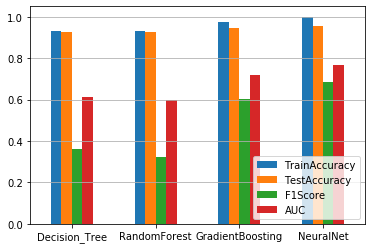

In [58]:
df_eval.plot.bar(rot=0)
plt.legend(loc='lower right')
plt.grid(axis='y')
